In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

import cd.datasets.market as mkt
from cd.datasets.newsmarket import NewsMarket as NM
from cd.data.newsmarketanalyzer import NewsMarketAnalyzer as NMA

import cd.model.utility as ut

plt.rcParams['font.family'] = 'serif'
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


## With two features - Bias and VIX (vol proxy)

In [31]:
r = mkt.load(2007,2015)
r = r[['r']]
vol = mkt.load_vol(2007,2015)
newsmarketvol = r.join(vol,how='inner')
newsmarketvol = NM(newsmarketvol)

In [32]:
analyzervol = NMA(newsmarketvol,shuffle=False)

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/TBM/Recherche/Memoire/cd/datasets/newsmarket.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[:,cols] = val.values
/Users/TBM/Recherche/Memoire/cd/datasets/newsmarket.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  super().__setitem__(key,val)


In [33]:
u = ut.LinearPlateauUtility(1,0.8*max(newsmarketvol.r))
λs = np.logspace(-5.5,-2,50)
cvsvol = analyzervol.cross_val(λs,u)

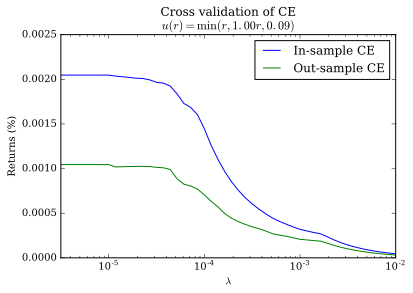

In [34]:
plt.plot(λs,cvsvol)
plt.xscale('log')
plt.axis(xmax=max(λs),xmin=min(λs))
plt.xlabel('$\lambda$')
plt.ylabel('Returns (%)')
plt.legend(['In-sample CE','Out-sample CE'])
plt.title('Cross validation of CE\n%s' % str(u));

In [6]:
u = ut.RiskNeutralUtility()
λs = np.logspace(-4.5,-2,50)
cvs = analyzer.cross_val(λs,u)

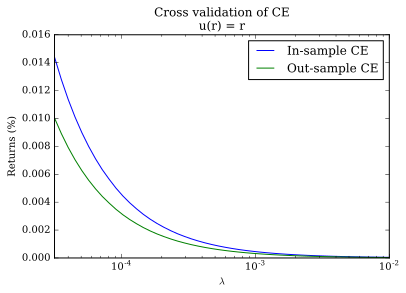

In [7]:
plt.plot(λs,cvs)
plt.xscale('log')
plt.axis(xmax=max(λs),xmin=min(λs))
plt.xlabel('$\lambda$')
plt.ylabel('Returns (%)')
plt.legend(['In-sample CE','Out-sample CE'])
plt.title('Cross validation of CE\n%s' % str(u));

## Comparison when using only bias

In [17]:
newsmarketbias = NM(r)

In [18]:
analyzerbias = NMA(newsmarketbias,shuffle=False)

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/TBM/Recherche/Memoire/cd/datasets/newsmarket.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[:,cols] = val.values
/Users/TBM/Recherche/Memoire/cd/datasets/newsmarket.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  super().__setitem__(key,val)


In [19]:
u = ut.LinearPlateauUtility(1,0.8*max(newsmarket.r))
λs = np.logspace(-5.5,-2,50)
cvsbias = analyzerbias.cross_val(λs,u)

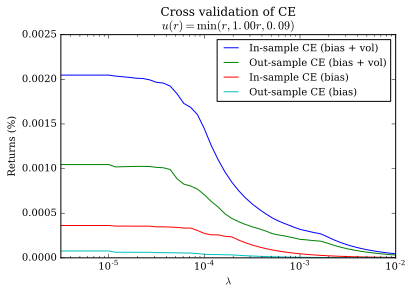

In [40]:
plt.plot(λs,cvsvol,λs,cvsbias)
plt.xscale('log')
plt.axis(xmax=max(λs),xmin=min(λs))
plt.xlabel('$\lambda$')
plt.ylabel('Returns (%)')
plt.legend(['In-sample CE (bias + vol)','Out-sample CE (bias + vol)','In-sample CE (bias)','Out-sample CE (bias)'],
          prop={'size':10})
plt.title('Cross validation of CE\n%s' % str(u));